<a href="https://colab.research.google.com/github/pavlo-da/module-task-python/blob/main/Python_for_DA_Module_Task.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#1. Data overview
- Завантаж датасет, розберись зі змістом колонок, зроби їх опис.
- Вияви ключові поля, що поєднують три таблиці.

##events

Order ID	- Унікальний ідентифікатор замовлення

Order Date	- Дата оформлення замовлення (формат: MM/DD/YYYY)

Ship Date	- Дата відправлення замовлення клієнту (формат: MM/DD/YYYY)

Order Priority	- Пріоритет замовлення (категорії: H — високий, M — середній, L — низький, C — критичний)

Country Code	- 3-літерний ISO-код країни, до якої відправлено замовлення

Product ID	- Унікальний ідентифікатор товару

Sales Channel	- Канал продажу: Online (інтернет-магазин) або Offline (фізичний магазин/інші канали)

Units Sold	- Кількість одиниць товару, проданих у замовленні

Unit Price	- Ціна за одну одиницю товару у замовленні (у грошових одиницях)

Unit Cost- Собівартість однієї одиниці товару для компанії

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

file_path = '/content/drive/MyDrive/Mate_homework/events.csv'
events = pd.read_csv(file_path)
events.head()

Mounted at /content/drive


,Order ID,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost
0,100640618,10/8/2014,10/18/2014,M,NOR,2103,Online,650.0,205.70,117.11
1,100983083,8/11/2016,8/11/2016,C,SRB,2103,Offline,1993.0,205.70,117.11
2,101025998,7/18/2014,8/11/2014,M,NaN,7940,Online,4693.0,668.27,502.54
3,102230632,5/13/2017,6/13/2017,L,MNE,2455,Online,1171.0,109.28,35.84
4,103435266,8/11/2012,9/18/2012,H,SRB,1270,Offline,7648.0,47.45,31.79


##products

id	- Унікальний ідентифікатор товару (відповідає Product ID з датасету events)

item_type - Категорія або тип товару

In [ ]:
file_path = '/content/drive/MyDrive/Mate_homework/products.csv'
products = pd.read_csv(file_path)
products.head()

,id,item_type
0,2103,Cereal
1,7940,Household
2,2455,Clothes
3,1270,Beverages
4,8681,Office Supplies


##countries

name - Повна назва країни або території

alpha-2	- 2-літерний ISO-код країни (стандарт ISO 3166-1 alpha-2)

alpha-3	- 3-літерний ISO-код країни (стандарт ISO 3166-1 alpha-3), відповідає Country Code з датасету events

region	- Головний географічний регіон, до якого належить країна.

sub-region - Підрегіон або зона всередині головного регіону

In [ ]:
file_path = '/content/drive/MyDrive/Mate_homework/countries.csv'
countries = pd.read_csv(file_path)
countries.head()

,name,alpha-2,alpha-3,region,sub-region
0,Afghanistan,AF,AFG,Asia,Southern Asia
1,Åland Islands,AX,ALA,Europe,Northern Europe
2,Albania,AL,ALB,Europe,Southern Europe
3,Algeria,DZ,DZA,Africa,Northern Africa
4,American Samoa,AS,ASM,Oceania,Polynesia


#2. Data cleaning
- Подивись, чи є пропущені значення у кожній таблиці, оціни їх долю, спробуй зрозуміти причини їх виникнення.
- Заповни або видали пропущені значення, обґрунтувавши свою думку.
- Подивись, чи всі типи даних розпізнаються коректно. Якщо є розбіжності, потрібно виявити та усунути причини, за потреби, зробити перетворення типів у колонках.
- Досліди дані на наявність дублікатів. Зверни увагу, що дублікати можуть траплятися через зайві пробіли (або інші символи) у комірках, розбіжність у великих/малих літерах, схожість літер у кирилиці/латиниці тощо. За потреби, зроби перетворення для усунення дублікатів.
- Досліди дані на наявність аномалій. Якщо є, спробуй зрозуміти причини.

 IQR-метод (для виявлення аномалій)

In [ ]:
def detect_outliers_iqr(data, column):
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = data[(data[column] < lower_bound) | (data[column] > upper_bound)]
    return outliers

##events

In [ ]:
events.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1330 entries, 0 to 1329
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Order ID        1330 non-null   int64  
 1   Order Date      1330 non-null   object 
 2   Ship Date       1330 non-null   object 
 3   Order Priority  1330 non-null   object 
 4   Country Code    1248 non-null   object 
 5   Product ID      1330 non-null   int64  
 6   Sales Channel   1330 non-null   object 
 7   Units Sold      1328 non-null   float64
 8   Unit Price      1330 non-null   float64
 9   Unit Cost       1330 non-null   float64
dtypes: float64(3), int64(2), object(5)
memory usage: 104.0+ KB


In [ ]:
events.isna().mean() * 100

,0
Order ID,0.000000
Order Date,0.000000
Ship Date,0.000000
Order Priority,0.000000
Country Code,6.165414
Product ID,0.000000
Sales Channel,0.000000
Units Sold,0.150376
Unit Price,0.000000
Unit Cost,0.000000


In [ ]:
events['Sales Channel'] = events['Sales Channel'].str.capitalize()


###Заповнення пропусків у Units Sold медіаною
Units Sold - числова колонка, тому медіана зберігає статистичну структуру даних, і не спотворює їх.

In [ ]:
events['Units Sold'] = events['Units Sold'].fillna(events['Units Sold'].median())

###Заповнення пропусків у Country Code як Unknown
Заміна на Unknown дозволяє явно позначити пропуски, уникаючи видалення рядків (що може призвести до втрати інших важливих даних).

In [ ]:
events['Country Code'] = events['Country Code'].fillna('Unknown')

###Перетворення Order Date та Ship Date на datetime

In [ ]:
events['Order Date'] = pd.to_datetime(events['Order Date'], format='%m/%d/%Y')
events['Ship Date'] = pd.to_datetime(events['Ship Date'], format='%m/%d/%Y')

###Зміна типів Order ID та Product ID на object

In [ ]:
events['Order ID'] = events['Order ID'].astype('object')
events['Product ID'] = events['Product ID'].astype('object')

###Пошук дублікатів

In [ ]:
duplicate_rows = events.duplicated()
print(duplicate_rows.sum())

0


###Пошук аномалій

In [ ]:
events.select_dtypes(include='float64').describe()

,Units Sold,Unit Price,Unit Cost
count,1330.000000,1330.000000,1330.000000
mean,4952.216541,264.893541,187.246812
std,2903.012194,217.323460,176.158873
min,2.000000,9.330000,6.920000
25%,2360.750000,81.730000,35.840000
50%,4962.000000,154.060000,97.440000
75%,7458.750000,437.200000,263.330000
max,9999.000000,668.270000,524.960000


In [ ]:
outliers_units = detect_outliers_iqr(events, 'Units Sold')
print(outliers_units[['Units Sold']])

Empty DataFrame
Columns: [Units Sold]
Index: []


In [ ]:
outliers_units = detect_outliers_iqr(events, 'Unit Price')
print(outliers_units[['Unit Price']])

Empty DataFrame
Columns: [Unit Price]
Index: []


In [ ]:
outliers_units = detect_outliers_iqr(events, 'Unit Cost')
print(outliers_units[['Unit Cost']])

Empty DataFrame
Columns: [Unit Cost]
Index: []


##products

In [ ]:
products.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   id         12 non-null     int64 
 1   item_type  12 non-null     object
dtypes: int64(1), object(1)
memory usage: 324.0+ bytes


In [ ]:
products.isna().mean() * 100

,0
id,0.0
item_type,0.0


###Зміна ID на object

In [ ]:
products['id'] = products['id'].astype('object')

###Пошук дублікатів

In [ ]:
duplicate_rows = products.duplicated()
print(duplicate_rows.sum())

0


##countries

In [ ]:
countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 249 entries, 0 to 248
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   name        249 non-null    object
 1   alpha-2     248 non-null    object
 2   alpha-3     249 non-null    object
 3   region      248 non-null    object
 4   sub-region  248 non-null    object
dtypes: object(5)
memory usage: 9.9+ KB


In [ ]:
countries.isna().mean() * 100

,0
name,0.000000
alpha-2,0.401606
alpha-3,0.000000
region,0.401606
sub-region,0.401606


###Пошук пропусків

In [ ]:
countries[countries.isnull().any(axis=1)]

,name,alpha-2,alpha-3,region,sub-region
8,Antarctica,AQ,ATA,NaN,NaN
153,Namibia,NaN,NAM,Africa,Sub-Saharan Africa


Пропуски вирішенно залишити, так як основні клітинки заповненні (name та alpha-3)

###Пошук дублікатів

In [ ]:
duplicate_rows = countries.duplicated()
print(duplicate_rows.sum())

0


#3. Data analysis and visualization.
- Проведи з’єднання трьох таблиць в один датафрейм. Видали непотрібні для аналізу колонки. За потреби, зроби перейменування колонок.

- Розпочни з ключових метрик діяльності компанії: загальна кількість замовлень, загальний прибуток, загальна кількість охоплених країн тощо (придумай інші метрики).

- Проаналізуй продажі (доходи, витрати, прибутки, популярність товарів) та зроби відповідні візуалізації в розрізі:

  - категорій товарів;
  - географії (країн, регіонів);
  - каналів продажу (онлайн або офлайн).
- Проаналізуй інтервал часу між замовленням та його відвантаженням та зроби відповідні візуалізації в розрізі:

  - категорій товарів;
  - країн;
  - регіонів.
- Проаналізуй, чи залежить прибуток від часу, необхідного на відвантаження товару. Зроби потрібні для цього агрегування та візуалізації.

- Проаналізуй за допомогою візуалізації динаміку продажів (у часі) у розрізі категорій товарів, країн, регіонів, визнач основні тенденції.

- Проведи аналіз продажів товарів за днями тижня. Чи можна деякі товари вважати сезонними?

In [ ]:
# Об'єднання events з products за Product ID
df = events.merge(products, left_on='Product ID', right_on='id', how='left')

# Об'єднання з countries за Country Code (alpha-3)
df = df.merge(countries, left_on='Country Code', right_on='alpha-3', how='left')

# Видалення колонок
df.drop(columns=['id', 'alpha-3', 'alpha-2', 'Order ID'], inplace=True)

In [ ]:
df.head()

,Order Date,Ship Date,Order Priority,Country Code,Product ID,Sales Channel,Units Sold,Unit Price,Unit Cost,item_type,name,region,sub-region
0,2014-10-08,2014-10-18,M,NOR,2103,Online,650.0,205.70,117.11,Cereal,Norway,Europe,Northern Europe
1,2016-08-11,2016-08-11,C,SRB,2103,Offline,1993.0,205.70,117.11,Cereal,Serbia,Europe,Southern Europe
2,2014-07-18,2014-08-11,M,Unknown,7940,Online,4693.0,668.27,502.54,Household,NaN,NaN,NaN
3,2017-05-13,2017-06-13,L,MNE,2455,Online,1171.0,109.28,35.84,Clothes,Montenegro,Europe,Southern Europe
4,2012-08-11,2012-09-18,H,SRB,1270,Offline,7648.0,47.45,31.79,Beverages,Serbia,Europe,Southern Europe


Загальна кількість замовлень

In [ ]:
total_orders = len(df)
total_orders

1330

Загальний прибуток


In [ ]:
df['Revenue'] = df['Unit Price'] * df['Units Sold']
df['Cost'] = df['Unit Cost'] * df['Units Sold']
df['Profit'] = df['Revenue'] - df['Cost']
total_profit = df['Profit'].sum()
total_profit

np.float64(501842633.11999995)

Кількість унікальних країн

In [ ]:
total_countries = df['name'].nunique()
total_countries

45

Середній прибуток з одного замовлення

In [ ]:
average_profit_per_order = total_profit / total_orders
average_profit_per_order

np.float64(377325.28806015034)

Середній прибуток з одиниці товару

In [ ]:
average_profit_per_unit = df['Profit'].sum() / df['Units Sold'].sum()
average_profit_per_unit

np.float64(76.1932126572623)

Аналіз за категоріями товарів

In [ ]:
by_item = df.groupby('item_type')[['Revenue', 'Cost', 'Profit', 'Units Sold']].sum().sort_values('Revenue', ascending=False)

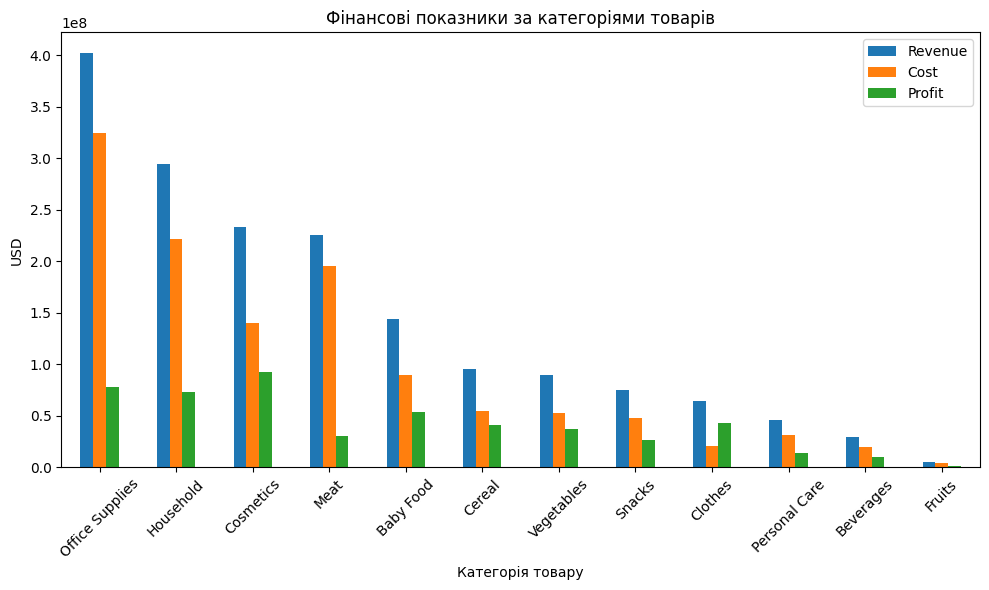

In [ ]:
by_item[['Revenue', 'Cost', 'Profit']].plot(
    kind='bar',
    figsize=(10,6),
    title='Фінансові показники за категоріями товарів'
)
plt.ylabel('USD')
plt.xlabel('Категорія товару')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Фінансові показники за категоріями товарів
Аналіз категорій за прибутком та рентабельністю

| Категорія        | Прибуток (% від загального) | Особливості |
|------------------|-----------------------------|-------------|
| **Office Supplies** | 15,54% | Лідер за Revenue (23,6%) та Cost (26,96%). Високі витрати знижують рентабельність. |
| **Cosmetics**       | 18,48% | Найвища рентабельність (Profit/Cost ≈ 66%). Ключовий драйвер прибутку. |
| **Household**       | 14,54% | Стабільний внесок у Revenue (17,26%). Оптимізація витрат може збільшити прибуток. |
| **Clothes**         | 8,65%  | Висока рентабельність (Profit/Revenue ≈ 67%) при низьких витратах (1,76%). |
| **Beverages**       | 1,91%  | Низька рентабельність через високі витрати. Потребує перегляду цінової стратегії. |

Висновки:

- Косметика та Одяг — найприбутковіші категорії. Варто збільшити їх частку в асортименті.

- Office Supplies та Meat мають високі витрати — необхідна оптимізація логістики/закупівель.

In [ ]:
total_revenue = by_item['Revenue'].sum()
total_cost = by_item['Cost'].sum()
total_profit = by_item['Profit'].sum()

In [ ]:
by_item['Revenue %'] = (by_item['Revenue'] / total_revenue * 100).round(2)
by_item['Cost %'] = (by_item['Cost'] / total_cost * 100).round(2)
by_item['Profit %'] = (by_item['Profit'] / total_profit * 100).round(2)
by_item

,Revenue,Cost,Profit,Units Sold,Revenue %,Cost %,Profit %
item_type,,,,,,,
Office Supplies,4.022140e+08,3.242368e+08,77977176.25,617641.0,23.60,26.96,15.54
Household,2.942052e+08,2.212427e+08,72962466.77,440249.0,17.26,18.39,14.54
Cosmetics,2.331548e+08,1.404315e+08,92723306.17,533291.0,13.68,11.68,18.48
Meat,2.258554e+08,1.952339e+08,30621562.40,535342.0,13.25,16.23,6.10
Baby Food,1.436476e+08,8.970659e+07,53940997.16,562706.0,8.43,7.46,10.75
Cereal,9.579140e+07,5.453637e+07,41255034.15,465685.0,5.62,4.53,8.22
Vegetables,8.974673e+07,5.297073e+07,36776002.72,582544.0,5.26,4.40,7.33
Snacks,7.478861e+07,4.776119e+07,27027422.40,490160.0,4.39,3.97,5.39
Clothes,6.462655e+07,2.119524e+07,43431314.40,591385.0,3.79,1.76,8.65


## Аналіз за країнами / регіонами

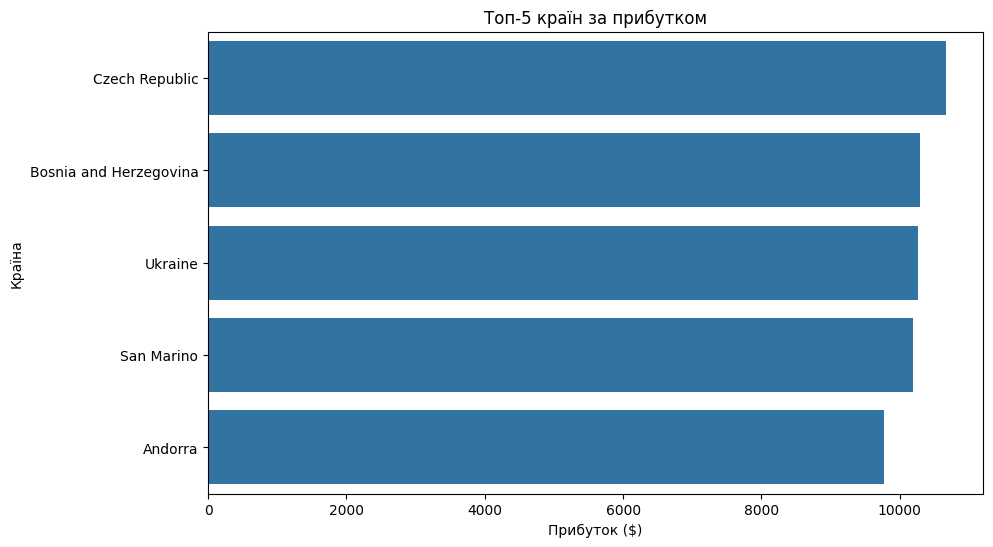

In [ ]:
country_profit = df.groupby('name')['Unit Price'].sum().nlargest(5)
plt.figure(figsize=(10, 6))
sns.barplot(
    x=country_profit.values,
    y=country_profit.index
)
plt.title('Топ-5 країн за прибутком')
plt.xlabel('Прибуток ($)')
plt.ylabel('Країна')
plt.show()

In [ ]:
country_profit

,Unit Price
name,
Czech Republic,10671.72
Bosnia and Herzegovina,10296.05
Ukraine,10262.86
San Marino,10194.71
Andorra,9774.25


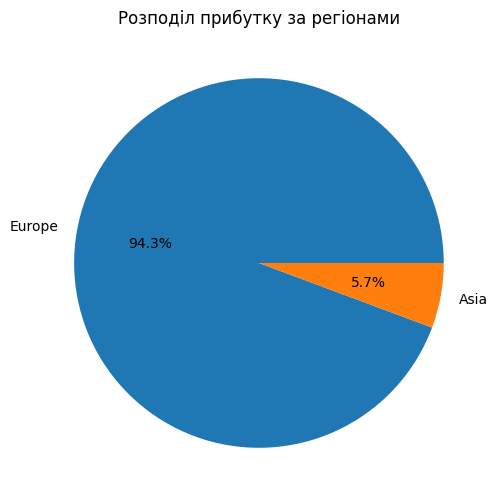

In [ ]:
region_profit = df.groupby('region')['Unit Price'].sum().sort_values(ascending=False)
plt.figure(figsize=(10, 6))
region_profit.plot(
    kind='pie',
    autopct='%1.1f%%'
)
plt.title('Розподіл прибутку за регіонами')
plt.ylabel('')
plt.show()

##Регіональний аналіз
1. Європа:

  - Формує переважаючу частину прибутку. Топ-5 країн — європейські.

  - Чехія лідирує з прибутком 10 671,72.

2. Азія:

  - Частка в прибутку — 5,7%. Невикористаний потенціал.

Рекомендації:

- Зосередитись на Європі, але розпочати пілотні проекти в Азії.

In [ ]:
region_profit

,Unit Price
region,
Europe,310963.51
Asia,18737.53


##Аналіз за каналами продажу

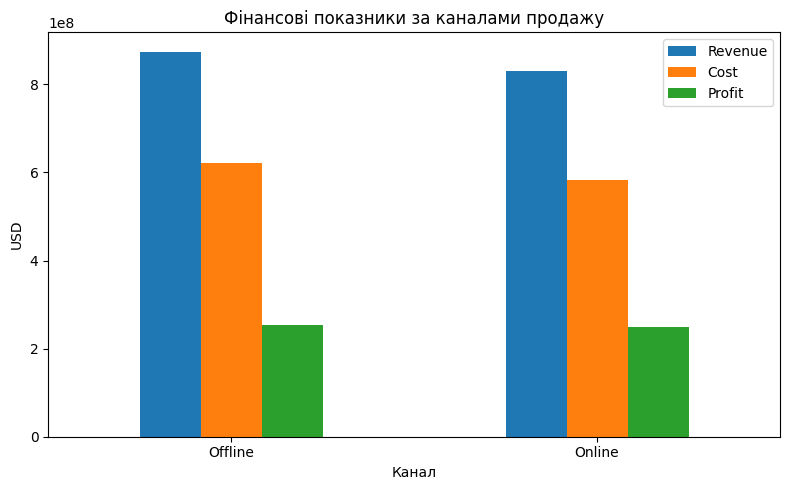

In [ ]:
by_channel = df.groupby('Sales Channel')[['Revenue', 'Cost', 'Profit']].sum()
by_channel.plot(
    kind='bar',
    figsize=(8,5),
    title='Фінансові показники за каналами продажу'
)
plt.xlabel('Канал')
plt.ylabel('USD')
plt.xticks(rotation=0)
plt.tight_layout()
plt.show()


###Висновок
Офлайн-канал популярніший, але онлайн-продажі мають потенціал для зростання через нижчу собівартість.



In [ ]:
by_channel['Profitability'] = by_channel['Profit'] / by_channel['Cost']
by_channel

,Revenue,Cost,Profit,Profitability
Sales Channel,,,,
Offline,8.742596e+08,6.203849e+08,2.538747e+08,0.409221
Online,8.303688e+08,5.824008e+08,2.479679e+08,0.425769


In [ ]:
df['Shipping Delay'] = (df['Ship Date'] - df['Order Date']).dt.days

##Візуалізація інтервалу доставки за категоріями товарів

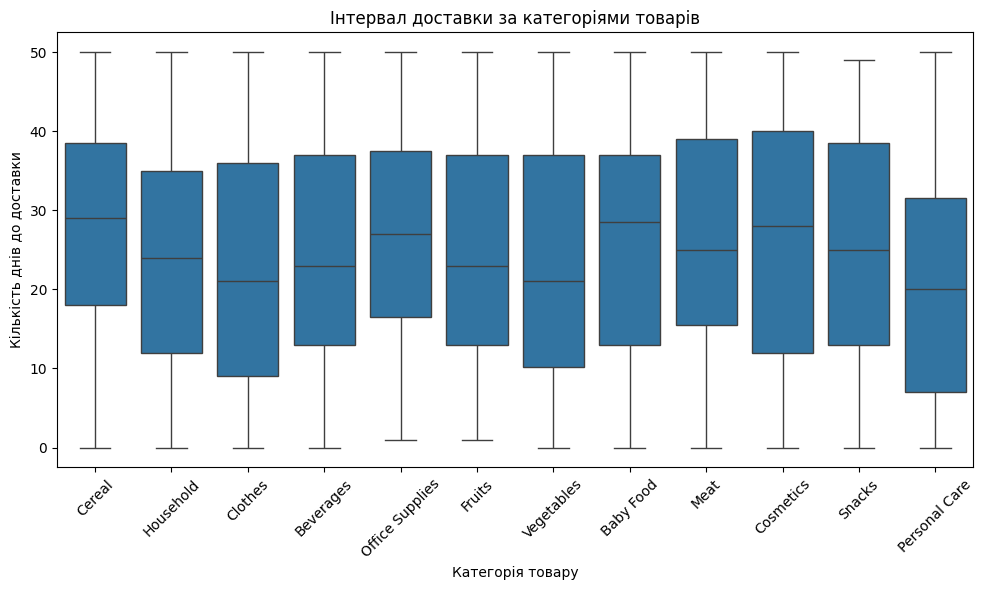

In [ ]:
plt.figure(figsize=(10, 6))
sns.boxplot(
    data=df,
    x='item_type',
    y='Shipping Delay'
)
plt.title('Інтервал доставки за категоріями товарів')
plt.xlabel('Категорія товару')
plt.ylabel('Кількість днів до доставки')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

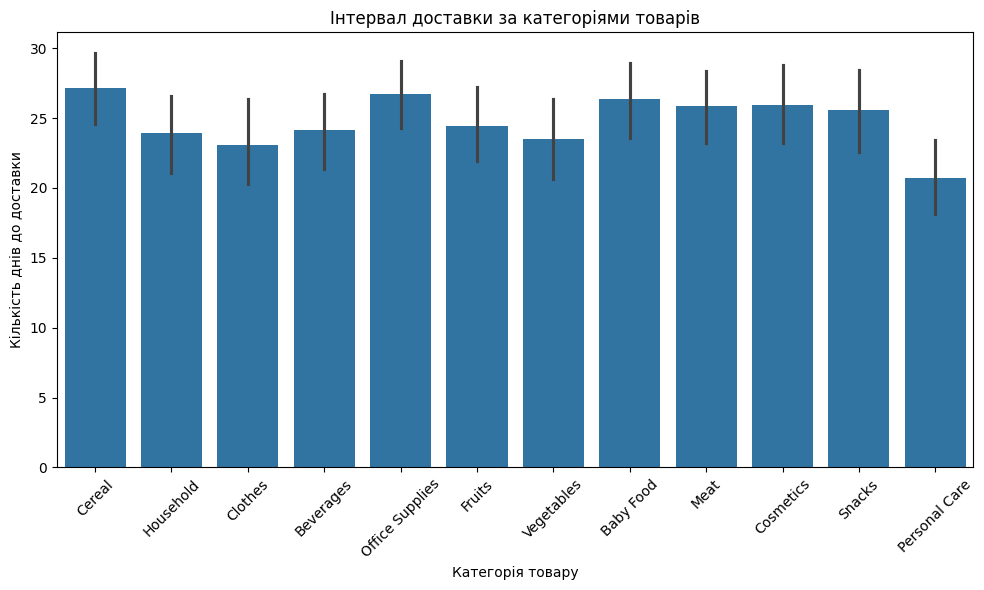

In [ ]:
plt.figure(figsize=(10, 6))
sns.barplot(
    data=df,
    x='item_type',
    y='Shipping Delay'
)
plt.title('Інтервал доставки за категоріями товарів')
plt.xlabel('Категорія товару')
plt.ylabel('Кількість днів до доставки')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

###Висновок
Категорії з тривалим інтервалом доставки — Cereal, Office Supplies і Baby Food — ймовірно, мають складніший ланцюг постачання або плануються оптовими партіями.
Personal Care доставляється найшвидше, що може свідчити про високий обіг або простішу логістику.
Варто оптимізувати логістику в категоріях з довгою доставкою, особливо якщо це впливає на задоволеність клієнтів.

In [ ]:
shipping_delay_table = df.groupby('item_type')['Shipping Delay'].mean().reset_index()
shipping_delay_table

,item_type,Shipping Delay
0,Baby Food,26.339286
1,Beverages,24.123967
2,Cereal,27.184466
3,Clothes,23.104762
4,Cosmetics,25.912281
5,Fruits,24.419643
6,Household,23.938144
7,Meat,25.846847
8,Office Supplies,26.707317
9,Personal Care,20.721739


##Візуалізація інтервалу доставки за країнами

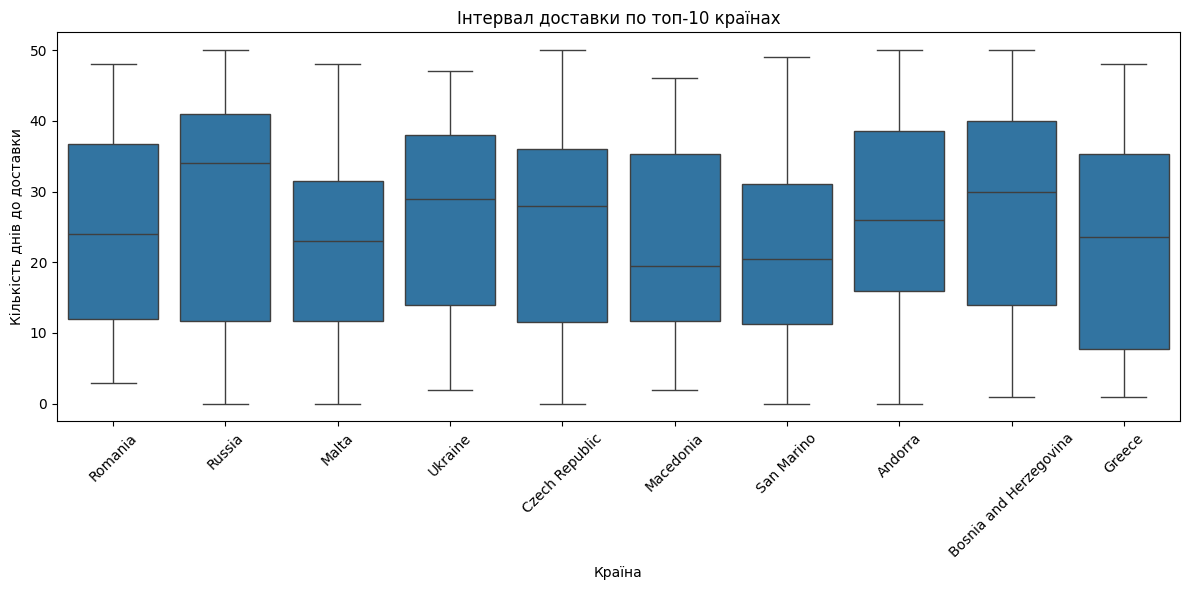

In [ ]:
top_countries = df['name'].value_counts().head(10).index
df_top_countries = df[df['name'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.boxplot(
    data=df_top_countries,
    x='name',
    y='Shipping Delay'
)
plt.title('Інтервал доставки по топ-10 країнах')
plt.xlabel('Країна')
plt.ylabel('Кількість днів до доставки')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

## Ключові спостереження
- Найдовший інтервал доставки:  
  - russia (27,38 днів) — логістичні складнощі через великі відстані або митні процедури.  
  - Andorra (26,28 днів) та Bosnia and Herzegovina (26,06 днів) — можливі вузькі логістичні коридори.
- Найкоротший інтервал доставки:  
  - Malta (21,56 днів) та San Marino (21,70 днів) — компактні території або пріоритетні маршрути.
- Середній діапазон:  
  Більшість країн (Czech Republic, Ukraine, Romania) мають доставку близько 25 днів.

### Висновки та рекомендації
1. Оптимізація ланцюга постачання  
   Для країн із довгим інтервалом (russia, Andorra, Bosnia and Herzegovina) варто переглянути партнерів з логістики або запровадити проміжні склади, щоб скоротити час доставки.

2. Пріоритизація та тарифікація  
   Врахувати можливість прискореної доставки за додаткову плату для ключових ринків із високим попитом.

3. Планування запасів  
   Прогнозувати потреби у продуктах для довгих маршрутів заздалегідь, щоб уникати дефіциту та підтримувати рівень обслуговування.

4. Розширення локальних хабів  
   Розглянути відкриття або оренду складів у центральних пунктах Європи (наприклад, у Чехії чи Румунії), щоб обслуговувати суміжні ринки швидше.


In [ ]:
top_countries = df['name'].value_counts().head(10).index
df_top_countries = df[df['name'].isin(top_countries)]

shipping_by_country = (
    df_top_countries.groupby('name')['Shipping Delay']
    .mean()
    .reset_index()
)

print(shipping_by_country)

                     name  Shipping Delay
0                 Andorra       26.275000
1  Bosnia and Herzegovina       26.060606
2          Czech Republic       25.225806
3                  Greece       23.000000
4               Macedonia       23.218750
5                   Malta       21.562500
6                 Romania       24.941176
7                  Russia       27.375000
8              San Marino       21.700000
9                 Ukraine       25.757576


##Візуалізація інтервалу доставки за регіонами

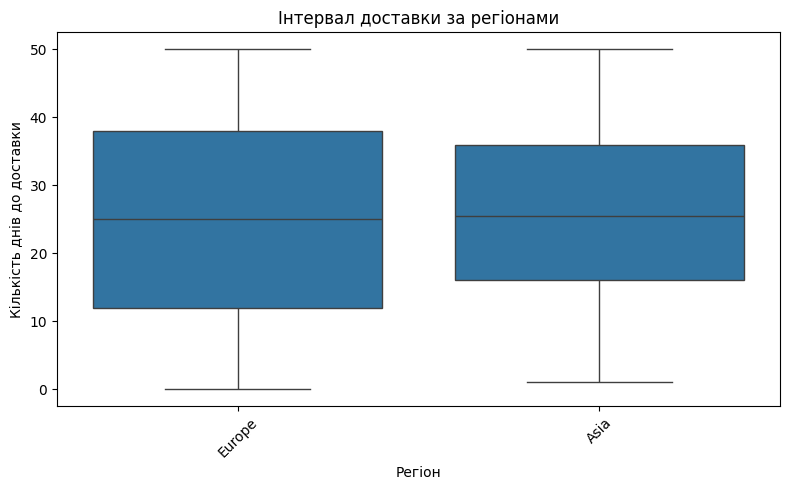

In [ ]:
plt.figure(figsize=(8, 5))
sns.boxplot(
    data=df,
    x='region',
    y='Shipping Delay'
)
plt.title('Інтервал доставки за регіонами')
plt.xlabel('Регіон')
plt.ylabel('Кількість днів до доставки')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

##Розподіл інтервалу доставки за регіонами
- Швидкість доставки:  
  В Європі середній час доставки становить близько 24,8 днів, в Азії — 26,1 дня. Різниця невелика, але помітна.  
- Розкид значень:  
  Обидва регіони мають високу варіативність (Std ≈ 14 днів) та максимальні затримки до 50 днів.  
  У Європі 25-й процентиль — 12 днів, в Азії — 16 днів, тобто чверть замовлень в Європі доставляється швидше.  
- Бізнес-імплікації:  
  1. Для азійського ринку варто переглянути партнерів із логістики, щоб зменшити середній час на 1–2 дні.  
  2. Для Європи доцільно зосередитися на утриманні рівня сервісу та зниженні максимальних затримок.  

In [ ]:
shipping_by_region = df.groupby('region')['Shipping Delay']
shipping_by_region.describe()


,count,mean,std,min,25%,50%,75%,max
region,,,,,,,,
Asia,82.0,26.085366,13.740273,1.0,16.0,25.5,36.0,50.0
Europe,1166.0,24.777873,14.675473,0.0,12.0,25.0,38.0,50.0


##Візуалізація залежності прибутку від часу доставки

In [ ]:
profit_by_delay = df.groupby('Shipping Delay')['Profit'].mean().reset_index()

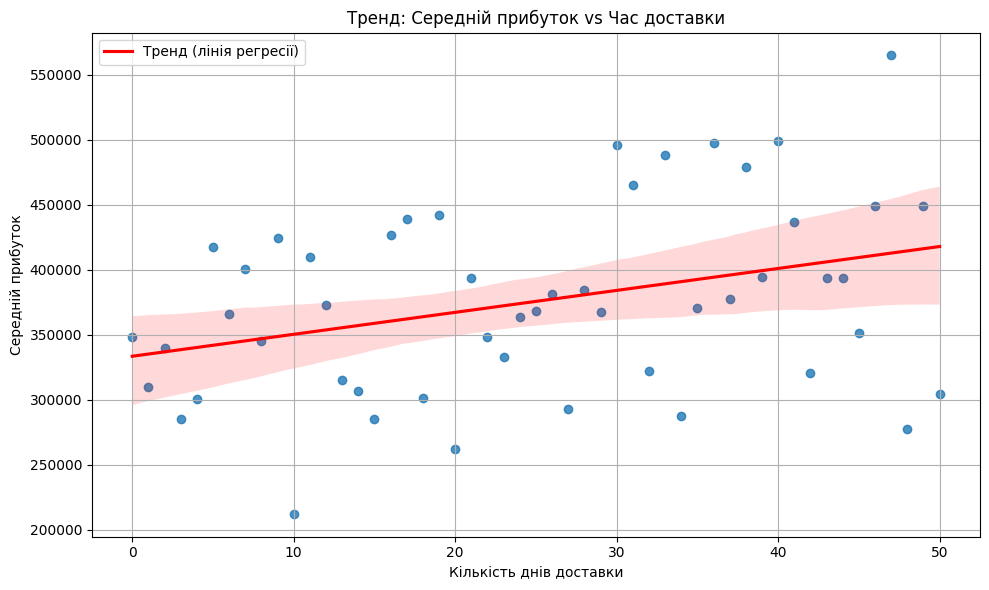

In [ ]:
plt.figure(figsize=(10, 6))

sns.regplot(
    data=profit_by_delay,
    x='Shipping Delay',
    y='Profit',
    line_kws={'color': 'red', 'label': 'Тренд (лінія регресії)'},
)

plt.title('Тренд: Середній прибуток vs Час доставки')
plt.xlabel('Кількість днів доставки')
plt.ylabel('Середній прибуток')
plt.grid(True)
plt.legend()
plt.tight_layout()
plt.show()

###Висновок
Згідно графіка, чим більший прибуток, тим довший час доставки. Це може свідчити про те, що великі замовлення плануються заздалегідь, щоб оптимізувати логістичні витрати.

##Візуалізація динаміки продажів

In [ ]:
df['Year'] = df['Order Date'].dt.year

In [ ]:
sales_by_category = df.groupby(['Year', 'item_type'])['Units Sold'].sum().reset_index()

In [ ]:
unique_categories = sales_by_category['item_type'].unique()
half = len(unique_categories) // 2

first_half = unique_categories[:half]
second_half = unique_categories[half:]

data_first = sales_by_category[sales_by_category['item_type'].isin(first_half)]
data_second = sales_by_category[sales_by_category['item_type'].isin(second_half)]

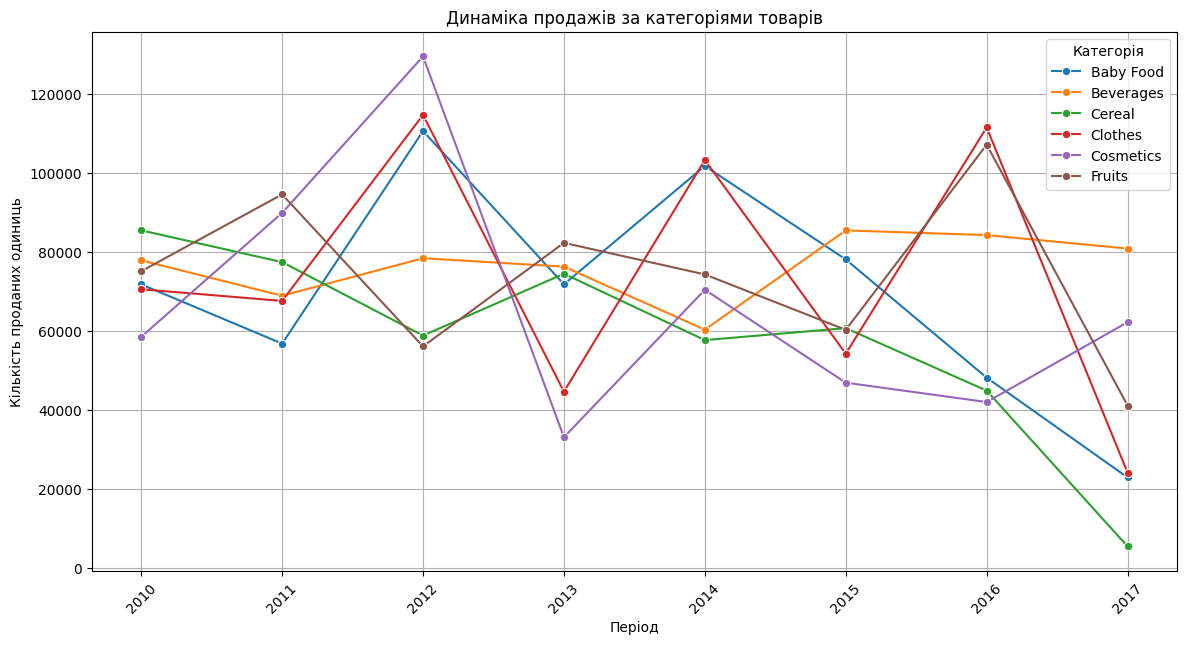

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_first,
    x='Year',
    y='Units Sold',
    hue='item_type',
    marker='o'
)
plt.title('Динаміка продажів за категоріями товарів')
plt.xlabel('Період')
plt.ylabel('Кількість проданих одиниць')
plt.xticks(rotation=45)
plt.legend(title='Категорія')
plt.grid(True)
plt.show()

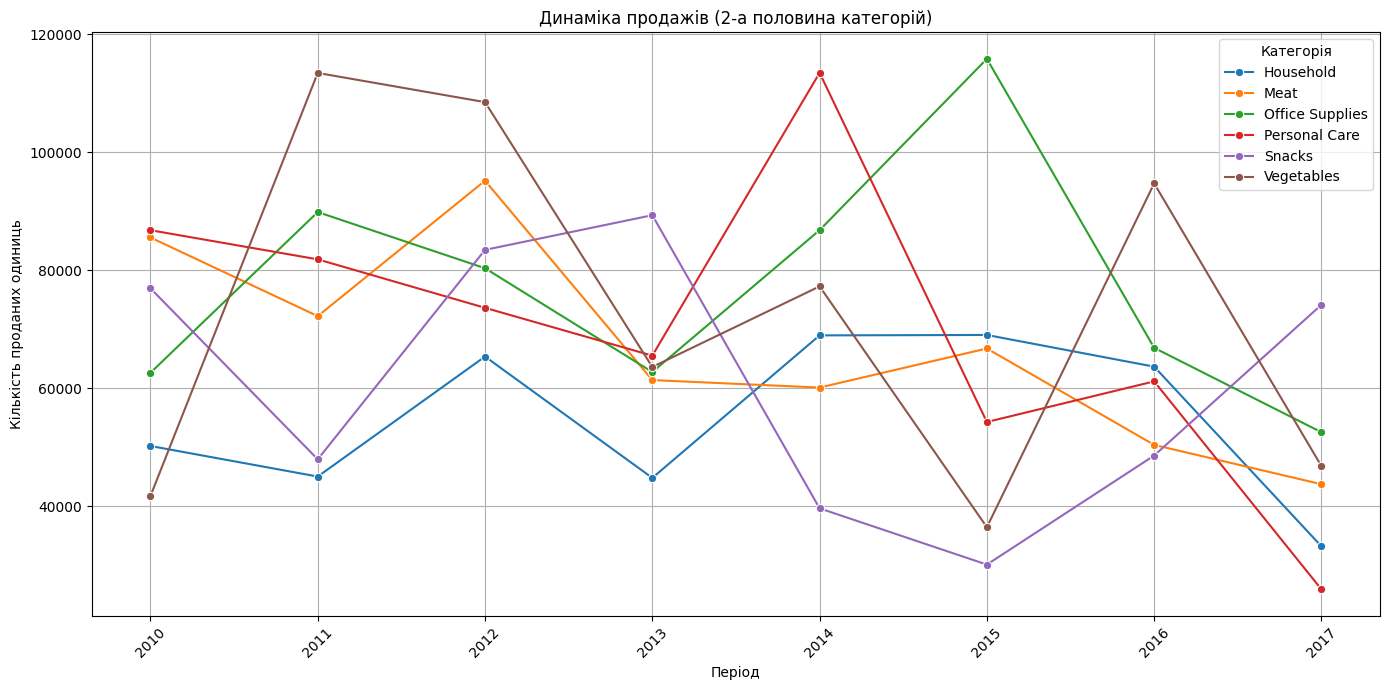

In [ ]:
plt.figure(figsize=(14, 7))
sns.lineplot(
    data=data_second,
    x='Year',
    y='Units Sold',
    hue='item_type',
    marker='o'
)
plt.title('Динаміка продажів (2-а половина категорій)')
plt.xlabel('Період')
plt.ylabel('Кількість проданих одиниць')
plt.xticks(rotation=45)
plt.legend(title='Категорія')
plt.grid(True)
plt.tight_layout()
plt.show()

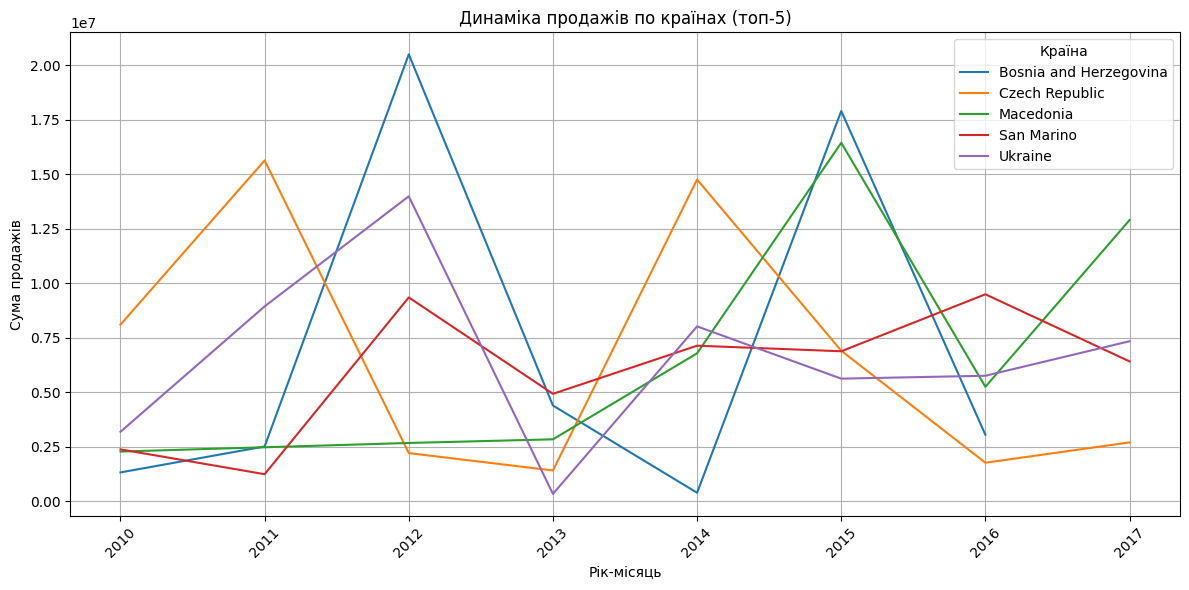

In [ ]:
country_trend = df.groupby(['Year', 'name'])['Revenue'].sum().reset_index()

top_countries = df.groupby('name')['Revenue'].sum().nlargest(5).index
filtered = country_trend[country_trend['name'].isin(top_countries)]

plt.figure(figsize=(12, 6))
sns.lineplot(data=filtered, x='Year', y='Revenue', hue='name')
plt.title('Динаміка продажів по країнах (топ-5)')
plt.xlabel('Рік-місяць')
plt.ylabel('Сума продажів')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Країна')
plt.show()

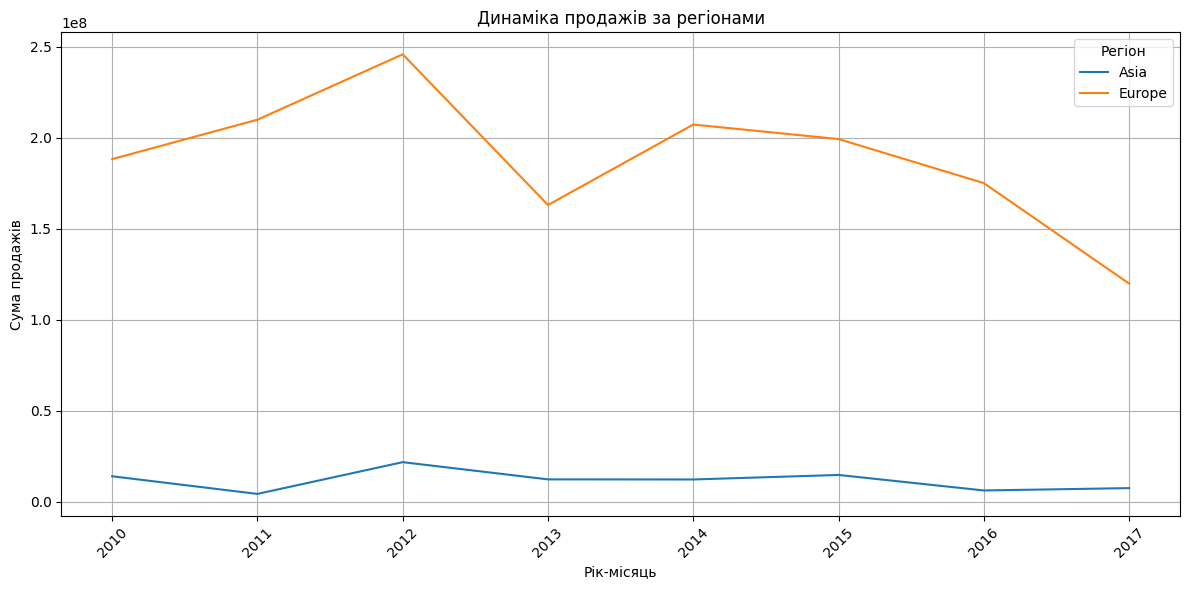

In [ ]:
region_trend = df.groupby(['Year', 'region'])['Revenue'].sum().reset_index()

plt.figure(figsize=(12, 6))
sns.lineplot(data=region_trend, x='Year', y='Revenue', hue='region')
plt.title('Динаміка продажів за регіонами')
plt.xlabel('Рік-місяць')
plt.ylabel('Сума продажів')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.legend(title='Регіон')
plt.show()

###Висновок
У динаміці продажів простежується сезонність з характерними коливаннями між роками. Спостерігається зростання обсягів у 2012, 2014 та 2015 роках, тоді як у 2013 році та після 2015 року фіксується помітний спад.

##Візуалізація розподілу продажів

In [ ]:
df['Day of Week'] = df['Order Date'].dt.day_name()
sales_by_day = df.groupby(['Day of Week', 'item_type'])['Units Sold'].sum().reset_index()

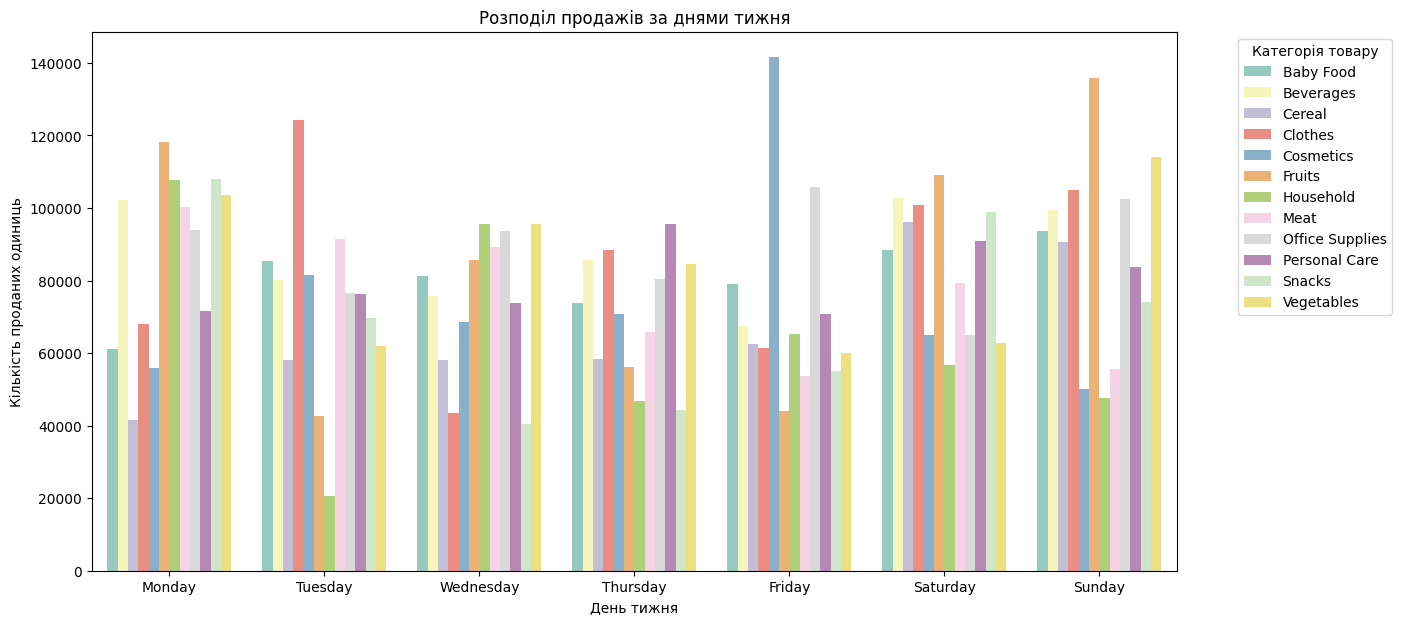

In [ ]:
plt.figure(figsize=(14, 7))
sns.barplot(
    data=sales_by_day,
    x='Day of Week',
    y='Units Sold',
    hue='item_type',
    palette='Set3',
    order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
)
plt.title('Розподіл продажів за днями тижня')
plt.xlabel('День тижня')
plt.ylabel('Кількість проданих одиниць')
plt.legend(title='Категорія товару', bbox_to_anchor=(1.05, 1))
plt.show()

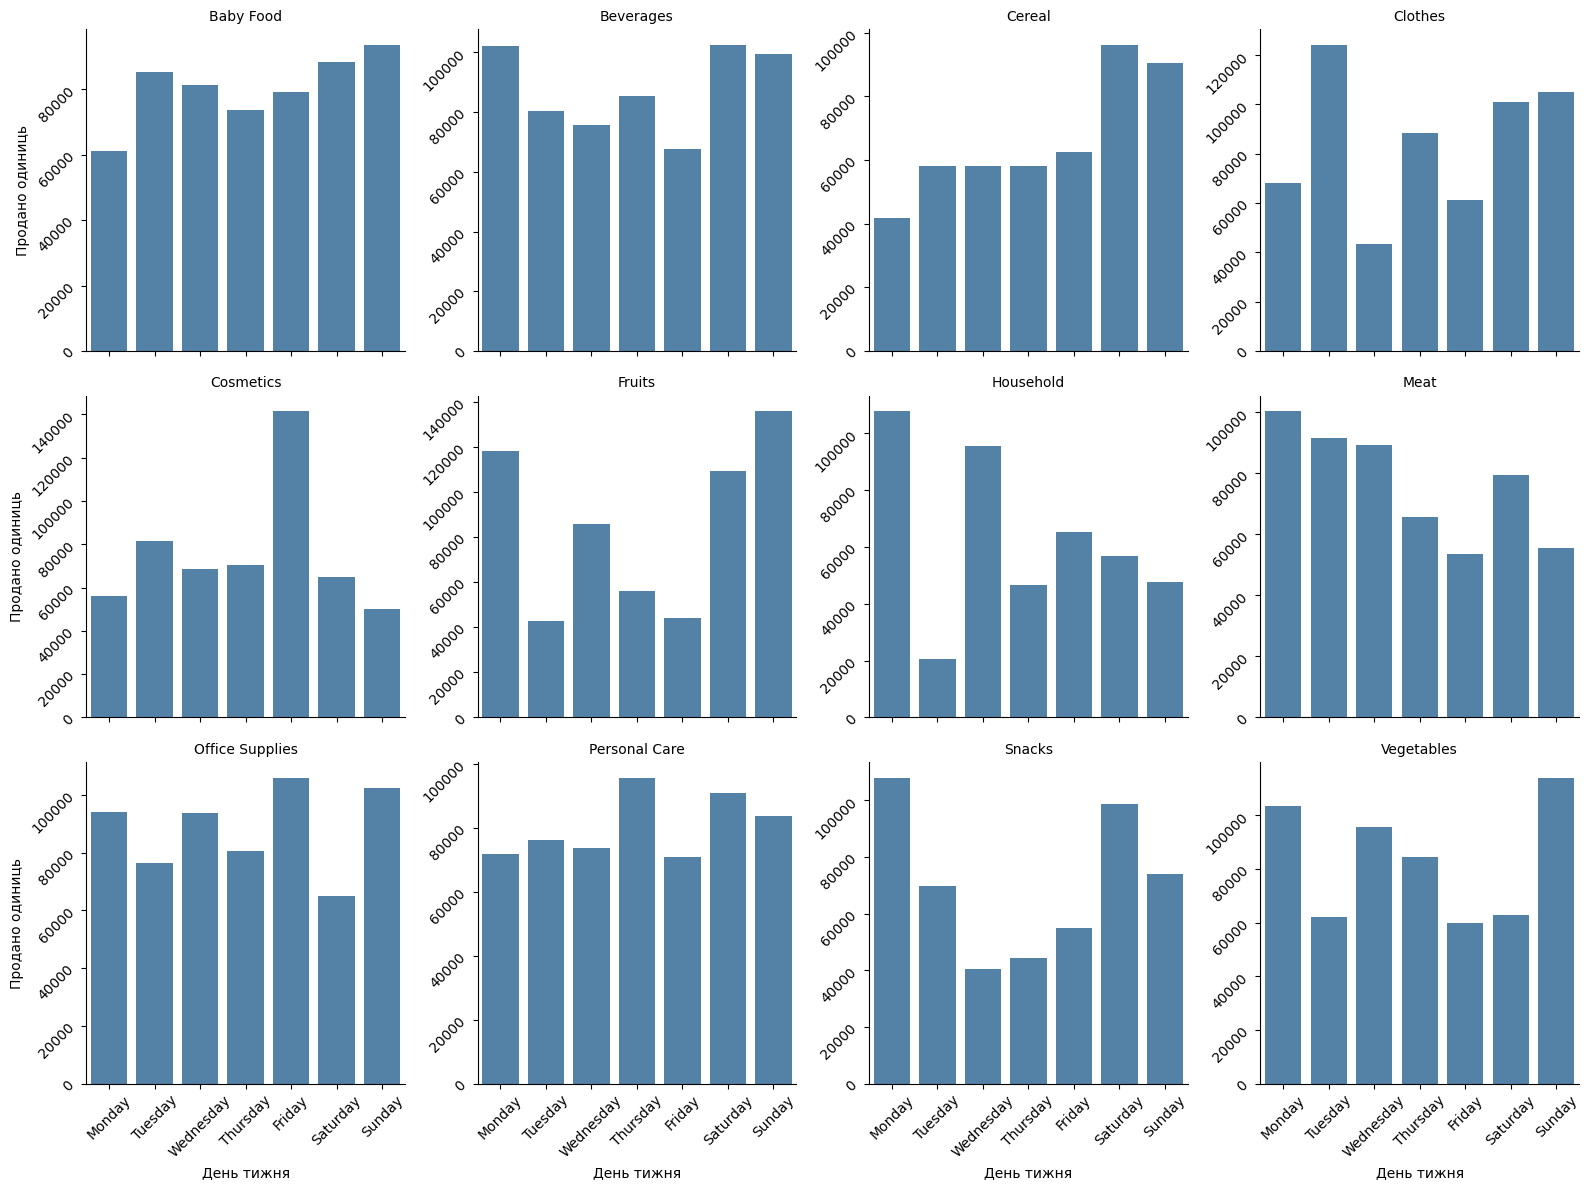

In [ ]:
g = sns.FacetGrid(sales_by_day, col="item_type", col_wrap=4, height=4, sharey=False)
g.map_dataframe(sns.barplot, x="Day of Week", y="Units Sold",
                order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'],
                color='steelblue')
g.set_titles(col_template="{col_name}")
g.set_axis_labels("День тижня", "Продано одиниць")
for ax in g.axes.flatten():
    ax.tick_params(labelrotation=45)
plt.tight_layout()
plt.show()

###Висновок
Cereal (Крупи) демонструє чітку сезонність на вихідних (субота-неділя).

Clothes (Одяг) має пік у вівторок.

Cosmetics (Косметика) найбільше продається у п’ятницю.

#4. Reporting
Склади детальний звіт у файлі Google Colab із кодом, графіками та поясненнями. Зроби висновки з точки зору бізнес-логіки. Цей звіт можна буде використати у резюме як твій реальний кейс проєкту у Data Analytics.